# Comparison conduit models

### 1) Model 1: One chamber, constant influx
Governing equation
\begin{equation}
\frac{d\Delta P}{dt} = \frac{G}{\gamma\pi R^3}(q_{in} - \frac{\pi a^4 }{8\mu H}\Delta P)
\end{equation}

\begin{equation}
\Delta P(0)= \Delta P_c
\end{equation}



Scaled version:
\begin{equation}
\frac{d\Delta P}{dt} = R1 - \Delta P
\end{equation}
\begin{equation}
\Delta P(0)= 1
\end{equation}

With characteristic scales for pressure and time:
\begin{equation}
\Delta P^* = \Delta P_c
\end{equation}

\begin{equation}
t^* = \frac{\gamma R^3 8 \mu H}{G a^4}
\end{equation}

With characterstic scale for flux:
\begin{equation}
q^* = \frac{\pi a^4 \Delta P_c}{8 \mu H}
\end{equation}

\begin{equation}
R1 = \frac{8 \mu H q_{in}}{\pi a^4 \Delta P_c}
\end{equation}

Solution:
\begin{equation}
\Delta P = R_1 +(R_1 - 1)e^{-t}
\end{equation}

\begin{equation}
q_{out} = \Delta P
\end{equation}

\begin{equation}
V = R_1t + (R_1 - 1)(e^{-t} - 1)
\end{equation}



In [2]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,3,100)
dt = t[1] - t [0]
par = np.linspace(0,1,3)
par = [0]
col = np.linspace(0.2,0.8,len(par))
fig = plt.figure(0)
plt.title('Pre-eruptive')
plt.plot(t,np.linspace(0,1,len(t)))
plt.xlabel('t')
plt.ylabel('Pressure')

plt.figure(1,figsize = (8,18))
plt.title('Eruption')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
V_linear = t
count = 0
for R1 in par:
    vc = 0
    V = np.zeros(len(t))
    P = R1 - (R1 - 1) * np.exp(-t)
    Q = P
    V = R1 * t + (R1 - 1) * np.exp(-t) + (1 -R1)
    err = (V_linear - V) / V_linear
    plt.subplot(311)
    plt.plot(t,P,color = [0,col[count],col[count]])
    plt.ylabel('Pressure')
    plt.subplot(312)
    plt.plot(t,Q,color = [0,col[count],col[count]])
    plt.ylabel('Flux')
    plt.subplot(313)
    plt.plot(t,V,color = [0,col[count],col[count]])
    #plt.plot(t,R1 * t +(R1 -1)*(-t),'o')
    plt.ylabel('Volume')
    plt.xlabel('Time')
#     plt.subplot(414)
#     plt.plot(err,P)
#     plt.xlabel('error')
#     plt.ylabel('P')
    count = count + 1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


### 1) Model 2: Piston model

Governing equation
\begin{equation}
\frac{dh}{dt} = -\frac{a^4 }{8\mu r^2 L}(\rho g (h - d) + P_w  )
\end{equation}

\begin{equation}
h(0)= h_0
\end{equation}



Scaled version:
\begin{equation}
\frac{dh}{dt} = P2 - P1 - h 
\end{equation}
\begin{equation}
 h(0)= 1
\end{equation}


With characteristic scales for magma column height and time:
\begin{equation}
h* = h_0
\end{equation}

\begin{equation}
t^* = \frac{R^2 8 \mu l}{a^4 \rho g}
\end{equation}

With characterstic scale for flux:
\begin{equation}
q^* = \frac{\pi a^4 \rho g h_0}{8 \mu l}
\end{equation}

\begin{equation}
P1 = \frac{P_w}{\rho g h_0}
\end{equation}

\begin{equation}
P2 = \frac{d}{h_0}
\end{equation}


Solution:
\begin{equation}
h = (P1 - P2 + 1)e^{-t} + P2 - P1 
\end{equation}

\begin{equation}
q_{out} = (P1 - P2 + 1)e^{-t}
\end{equation}

\begin{equation}
V = (P1 - P2 + 1)(1 - e^{-t})
\end{equation}



/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

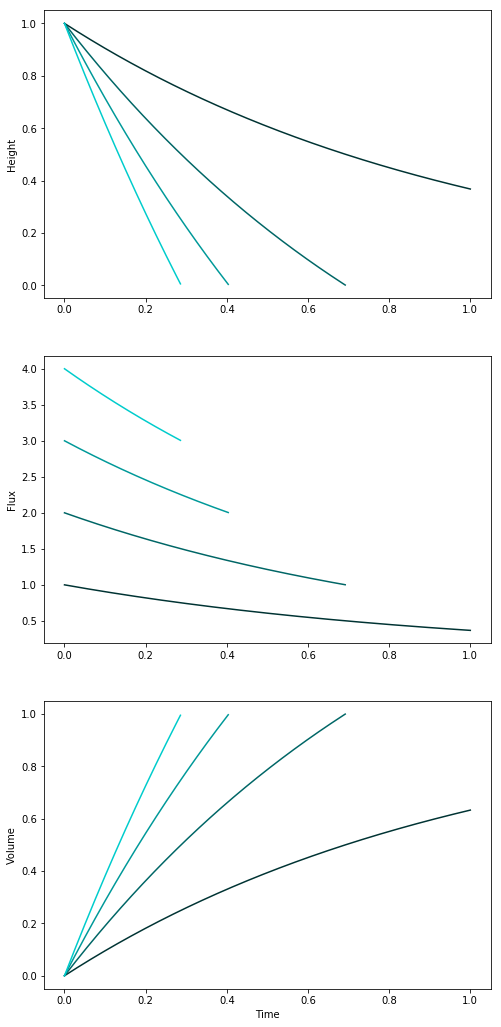

In [3]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,1,400)
par = np.linspace(0,3.0,4)
P2 = 0.0
col = np.linspace(0.2,0.8,len(par))
fig = plt.figure(0)

plt.figure(1,figsize = (8,18))
plt.title('Eruption')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count = 0
for P1 in par:
    vc = 0
    h = -P1 + P2 + (P1 - P2 + 1)*np.exp(-t)
    q = (P1 - P2 +1)* np.exp(-t)
    V =  (P1 -  P2 +1) * (1 - np.exp(-t))
    V_end = V[h > 0]
    V_end = V_end[-1]
    V[h<0] = np.nan
    q[h<0] = np.nan
    h[h<0] = np.nan
    plt.subplot(311)
    plt.plot(t,h,color = [0,col[count],col[count]])
    plt.ylabel('Height')
    plt.subplot(312)
    plt.plot(t,q,color = [0,col[count],col[count]])
    plt.ylabel('Flux')
    plt.subplot(313)
    plt.plot(t,V,color = [0,col[count],col[count]])
    #plt.plot(t,R1 * t +(R1 -1)*(-t),'o')
    plt.ylabel('Volume')
    plt.xlabel('Time')
    
#     plt.subplot(414)
#     plt.plot(err,P)
#     plt.xlabel('error')
#     plt.ylabel('P')
    count = count + 1







# Pressure as function of conduit radius

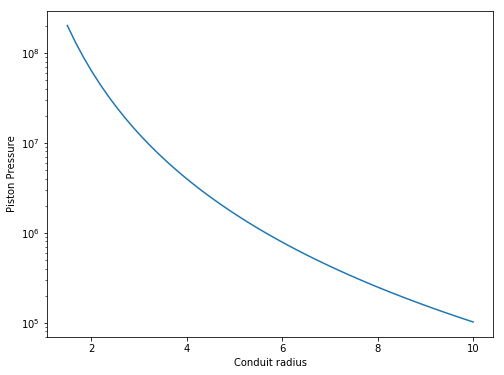

In [4]:
tend = 1e+7  
V0 = 1e+9
P = V0
l= 4*1e+4
mu = 100
a = np.linspace(1.5,10)
P = V0 / tend * l * 8 * mu / (np.pi * a**4)
plt.figure(1,figsize = (8,6))
plt.semilogy(a,P)
plt.xlabel('Conduit radius')
plt.ylabel('Piston Pressure')
plt.show()

In [5]:
R =  1500
h=1e+9 /(np.pi * R**2)
h

141.4710605261292

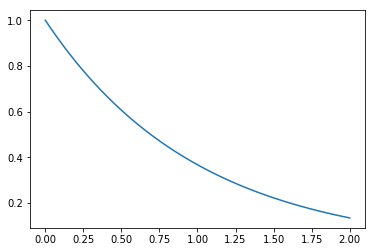

In [6]:
t = np.linspace(0,2)
plt.plot(t,np.exp(-t))
plt.show()

### 1) Model 2: One chamber, elastic deformation + constant pressure gradient
Governing equation
\begin{equation}
\frac{d\Delta P}{dt} = -\frac{G}{V}\frac{\pi a^4 }{8\mu L}(\Delta P - GL) 
\end{equation}
With $G$ is the constant pressure gradient.

\begin{equation}
\Delta P(0)= \Delta P_c
\end{equation}

Scaled version:
\begin{equation}
\frac{d\Delta P}{dt} =  - \Delta P - R_1
\end{equation}
\begin{equation}
\Delta P(0)= 1
\end{equation}
with 
\begin{equation}
R_1= \frac{GL}{\Delta P_c}
\end{equation}
This equation has solution
\begin{equation}
\Delta P = (R_1 + 1) exp(-t) - R_1
\end{equation}

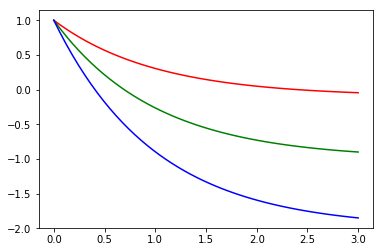

In [14]:
t = np.linspace(0,3)
R1 = 0.1
p = (R1 + 1)* np.exp(-t) - R1
plt.plot(t,p,'r')
R1 = 1
p = (R1 + 1)* np.exp(-t) - R1
plt.plot(t,p,'g')
R1 = 2
p = (R1 + 1)* np.exp(-t) - R1
plt.plot(t,p,'b')